# Question 1

In [1]:
import numpy as np
from sklearn import neighbors, datasets, naive_bayes, model_selection, metrics, preprocessing, svm
import matplotlib.pyplot as plt

cancerTrain = np.loadtxt(r'cancerTrain.csv', delimiter=",")
cancerTest = np.loadtxt(r'cancerTest.csv', delimiter=",")

train_data = cancerTrain[:,[0,1,2,3,4]]
test_data = cancerTest[:,[0,1,2,3,4]]

train_label = cancerTrain[:,5]
test_label = cancerTest[:,5]

1.use confusion matrix to assess the classification performance, display the results.

In [2]:
#KNN
model_knn=neighbors.KNeighborsClassifier(n_neighbors=3, p=1)
model_knn.fit(train_data,train_label)
test_predict_c = model_knn.predict(test_data)

print("accuracy(k=3):", model_knn.score(test_data,test_label))
print ("confusion matrix(k=3):", metrics.confusion_matrix(test_label, test_predict_c),sep="\n")

accuracy(k=3): 0.765625
confusion matrix(k=3):
[[59 20]
 [10 39]]


In [3]:
#SVM
svc_linear = svm.SVC(kernel="linear")
svc_rbf = svm.SVC(kernel="rbf")

svc_linear.fit(train_data, train_label)
svc_rbf.fit(train_data, train_label)

predict_linear = svc_linear.predict(test_data)
predict_rbf = svc_rbf.predict(test_data)

print("accuracy(kernel='linear'):", svc_linear.score(test_data,test_label))
print ("confusion matrix(kernel='linear'):", metrics.confusion_matrix(test_label, predict_linear),sep="\n")
print("\naccuracy(kernel='rbf'):", svc_rbf.score(test_data,test_label))
print ("confusion matrix(kernel='rbf'):", metrics.confusion_matrix(test_label, predict_rbf),sep="\n")

accuracy(kernel='linear'): 0.7421875
confusion matrix(kernel='linear'):
[[58 21]
 [12 37]]

accuracy(kernel='rbf'): 0.65625
confusion matrix(kernel='rbf'):
[[47 32]
 [12 37]]


In [4]:
#Naive_bayes
nb = naive_bayes.GaussianNB()
nb.fit(train_data,train_label)
predict_nb = nb.predict(test_data)
print("Naive Bayes Accuracy:", nb.score(test_data, test_label))
print ("Naive Bayes Confusion Matrix:", metrics.confusion_matrix(test_label, predict_nb),sep="\n")

Naive Bayes Accuracy: 0.734375
Naive Bayes Confusion Matrix:
[[59 20]
 [14 35]]


2.use AUC to assess the classification performance, plot the ROC.

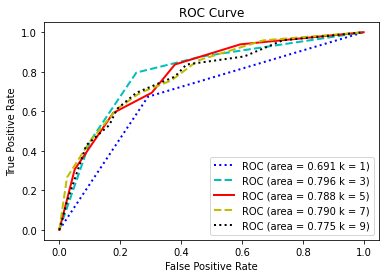

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

str = ['b:','c--','r','y--','k:']

for k in range(0,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=2*k+1, p=1)
    clf.fit(train_data,train_label)
    
    fpr, tpr, thersholds = roc_curve(test_label, clf.predict_proba(test_data)[:,1])

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, str[k], label="ROC (area = {:,.3f}".format(roc_auc)+" k = {})".format(2*k+1), lw=2)
    plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    
plt.show()

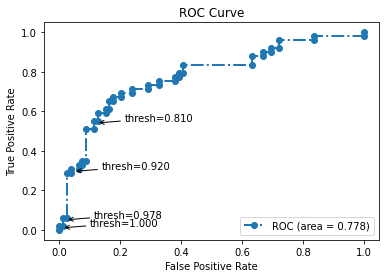

In [6]:
fpr, tpr, thersholds = roc_curve(test_label, nb.predict_proba(test_data)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'o-.', label="ROC (area = {:,.3f})".format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title("ROC Curve")
plt.legend(loc="lower right")

inves = np.array([1,3,7,15])
for idx in inves:
    th, f, t = thersholds[idx], fpr[idx], tpr[idx]
    plt.annotate('thresh={:.3f}'.format(th),
                xy=(f+.01, t-.01),
                xytext=(f+.1,t),
                arrowprops={'arrowstyle':'->'})

plt.show()

# Question 2

1.Read the two categories from the dataset using sklearn.datasets.load_files.You can start with 'comp.graphics' and 'sci.med'.

In [7]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'sci.med']
news_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

2.Using Scikit Learn sklearn.feature_extraction.text.CountVectorizer convert the text content into numerical feature vectors.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(news_train.data)

3.Using Scikit Learn sklearn.feature_extraction.text.TfidfTransformer compute the TF-IDF.
1)Term Frequency (TF) = (Number of times term t appears in a document)/(Number of terms in the document).
2)Inverse Document Frequency (IDF) = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. Thus having the effect of highlighting words that are distinct.
3)TF-IDF value is calculated as = TF IDF.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
print(X_train_tfidf.shape)

(1178, 24614)


4.Using Scikit Learn build a basic svm classifier model for this dataset.

In [10]:
docs_new = ['science is good', 'OpenGL on the GPU is fast']
docs_count = count_vect.transform(docs_new)

svm_li = svm.SVC(kernel='linear').fit(X_train_count, news_train.target)
predict_svm1 = svm_li.predict(docs_count)
for doc, category in zip(docs_new, predict_svm1):
    print('%r => %s' % (doc, news_train.target_names[category]))
    
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_count)
X_train_tf = tf_transformer.transform(X_train_count)
print(X_train_tf.shape)

'science is good' => comp.graphics
'OpenGL on the GPU is fast' => comp.graphics
(1178, 24614)


In [11]:
docs_new = ['science is good', 'I need a new CPU and GPU', 'this is a third sentence']
docs_count = count_vect.transform(docs_new)
docs_tf = tf_transformer.transform(docs_count)

svm_li = svm.SVC(kernel='linear').fit(X_train_tf, news_train.target)
predict_svm2 = svm_li.predict(docs_tf)
for doc, category in zip(docs_new, predict_svm2):
    print('%r => %s' % (doc, news_train.target_names[category]))

'science is good' => comp.graphics
'I need a new CPU and GPU' => comp.graphics
'this is a third sentence' => comp.graphics


5.Next contrast the performance with other classification models. For example, KNN and Naïve Bayes

In [12]:
#NB for comparison
docs_new = ['science is good', 'OpenGL on the GPU is fast']
docs_count = count_vect.transform(docs_new)

mul_nb = naive_bayes.MultinomialNB().fit(X_train_count,news_train.target)
predict_mul1 = mul_nb.predict(docs_count)
for doc, category in zip(docs_new, predict_mul1):
    print('%r => %s' % (doc, news_train.target_names[category]))

'science is good' => sci.med
'OpenGL on the GPU is fast' => comp.graphics


In [13]:
docs_new = ['science is good', 'I need a new CPU and GPU', 'this is a third sentence']
docs_count = count_vect.transform(docs_new)
docs_tf = tf_transformer.transform(docs_count)

mul_nb = naive_bayes.MultinomialNB().fit(X_train_tf, news_train.target)
predict_mul2 = mul_nb.predict(docs_tf)
for doc, category in zip(docs_new, predict_mul2):
    print('%r => %s' % (doc, news_train.target_names[category]))

'science is good' => sci.med
'I need a new CPU and GPU' => comp.graphics
'this is a third sentence' => sci.med


In [14]:
#KNN for comparison
docs_new = ['science is good', 'OpenGL on the GPU is fast']
docs_count = count_vect.transform(docs_new)

knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train_count,news_train.target)
predict_knn1 = knn.predict(docs_count)
for doc, category in zip(docs_new, predict_knn1):
    print('%r => %s' % (doc, news_train.target_names[category]))

'science is good' => comp.graphics
'OpenGL on the GPU is fast' => comp.graphics


In [15]:
docs_new = ['science is good', 'I need a new CPU and GPU', 'this is a third sentence']
docs_count = count_vect.transform(docs_new)
docs_tf = tf_transformer.transform(docs_count)

knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train_tf, news_train.target)
predict_knn2 = knn.predict(docs_tf)
for doc, category in zip(docs_new, predict_knn2):
    print('%r => %s' % (doc, news_train.target_names[category]))

'science is good' => comp.graphics
'I need a new CPU and GPU' => comp.graphics
'this is a third sentence' => comp.graphics
